# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 8: Partial Differential Equations (PDEs) 1 <a class="tocSkip">
    
### Homework exercises - solutions <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Stability-study-for-advection-diffusion-using-FTCS" data-toc-modified-id="Homework---Stability-study-for-advection-diffusion-using-FTCS-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Stability study for advection-diffusion using FTCS</a></span></li><li><span><a href="#Homework---An-analytical-solution-to-advection-diffusion" data-toc-modified-id="Homework---An-analytical-solution-to-advection-diffusion-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - An analytical solution to advection-diffusion</a></span><ul class="toc-item"><li><span><a href="#Solution---An-analytical-solution-to-advection-diffusion" data-toc-modified-id="Solution---An-analytical-solution-to-advection-diffusion-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution - An analytical solution to advection-diffusion</a></span></li></ul></li><li><span><a href="#Homework---Pure-advection---impact-of-time-step" data-toc-modified-id="Homework---Pure-advection---impact-of-time-step-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Pure advection - impact of time step</a></span><ul class="toc-item"><li><span><a href="#Solution---Pure-advection---impact-of-time-step" data-toc-modified-id="Solution---Pure-advection---impact-of-time-step-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution - Pure advection - impact of time step</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

# Homework


## Homework - Stability study for advection-diffusion using FTCS

Play around with the example from the lecture in the section "Stability study for advection-diffusion". In particular play around with the physical and numerical parameters and investigate further the interplay between these, the locations of eigenvalues in the complex plane, and the observed stability of the numerical solver.

## Homework - An analytical solution to advection-diffusion

An exact solution to the advection-diffusion equation is given by


$$ c(x,t) = \frac{1}{\sqrt{4\pi \, \kappa \,t}}\exp\left  (-\frac{(x-Ut)^2}{4\kappa \, t}\right).$$


1. Note that this holds in an infinite domain - we can make use of it only as long as our numerical solution is far away from boundaries, or in a periodic domain as long as the solution behaviour does not start to encroach on itself.


2. The initial condition that this solution corresponds to is a [Dirac-delta function](https://en.wikipedia.org/wiki/Dirac_delta_function). We clearly can't represent this on our mesh as it has infinitesimal thickness - all sorts of problems would arise if we tried to. But what we can do is assume that our simulation starts at some $t>0$ and initialise our problem with the corresponding exact solution (which for $t>0$ is a Gaussian and for sufficiently large times can be represented on our mesh).


Write a function to evaluate this exact analytical solution and use it to initialise a simulation and plot a comparison between the exact and analytical solution at later times.

I suggest you use periodic boundary conditions (e.g. your starting point could be our function from the lecture `solve_adv_diff_Gaussian2`).

First try selecting some appropriate physical and numerical parameters such that you have a stable solution and avoid boundaries. Then try refining the spatial and temporal mesh to see if your solution gets closer to the exact solution.

### Solution - An analytical solution to advection-diffusion

In [2]:
def adv_diff_analytical_solution(U, kappa, x0, x, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)

CFL:  0.50000
Pe_c: 2.00000
r:    0.25000


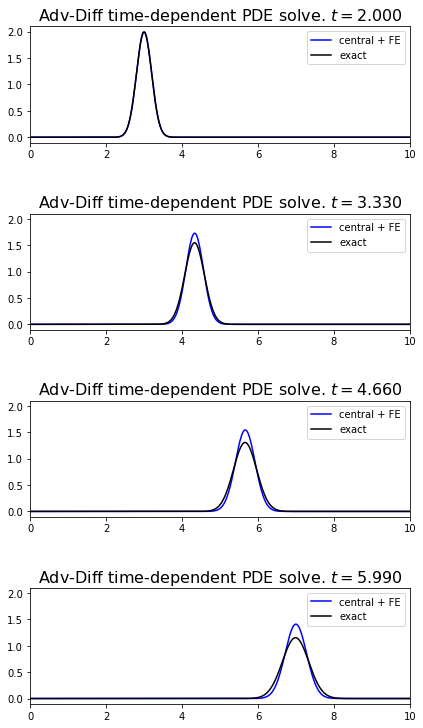

In [3]:
U = 1
kappa = 1./100.
N = 500
L = 10.
dx = L / N
dt = 0.01
t_start = 2.
t_end = t_start + 4.
x0 = 1.0

def adv_central_periodic(N):
    # advection - periodic
    Dx = 0.5*np.eye(N, k=1) - 0.5*np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dx[0, -1] = -0.5
    Dx[-1, 0] = 0.5
    return Dx

def diff_central_periodic(N):
    # diffusion - periodic
    Dxx = np.eye(N, k=1) - 2*np.eye(N) + np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dxx[0, -1] = 1
    Dxx[-1, 0] = 1
    return Dxx

def solve_adv_diff_Gaussian3(N, dt, t_start, t_end, U, kappa):
    """ Solve the advection-diffusion problem on a periodic domain
    with a hard coded Gaussian-shaped initial condition.
    
    Returns:
    C - the solution at all time levels.
    x - the spatial mesh.
    t - the time levels.
    """
    # define spatial mesh
    dx = L / N
    x = np.linspace(0, L, N)
       
    # create discretisation matrix
    Dx = adv_central_periodic(N)
    Dxx = diff_central_periodic(N)
    A = -(U / dx) * Dx + (kappa / dx**2) * Dxx

    t = np.arange(t_start, t_end, dt)

    C = np.empty((len(x), len(t)))
    
    # define an initial condition
    C[:,0] = adv_diff_analytical_solution(U, kappa, x0, x, t_start)
    
    I = np.eye(len(x))
    for n in range(len(t)-1):
        C[:,n+1] = (I + A * dt) @ C[:,n]
    return C, x, t

# and compute and print some key non-dimensional parameters
print('CFL:  {0:.5f}'.format(U*dt/dx))
print('Pe_c: {0:.5f}'.format(U*dx/kappa))
print('r:    {0:.5f}'.format(kappa*dt/(dx**2)))

# set up figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

C, x, t = solve_adv_diff_Gaussian3(N, dt, t_start, t_end, U, kappa)
xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, C.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x, C[:,n], 'b-', label='central + FE')
    axs[i].plot(xf, adv_diff_analytical_solution(U, kappa, x0, xf, t[n]), 'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('Adv-Diff time-dependent PDE solve. $t=${0:.3f}'.format(t[n]), fontsize=16)

CFL:  0.25000
Pe_c: 1.00000
r:    0.25000


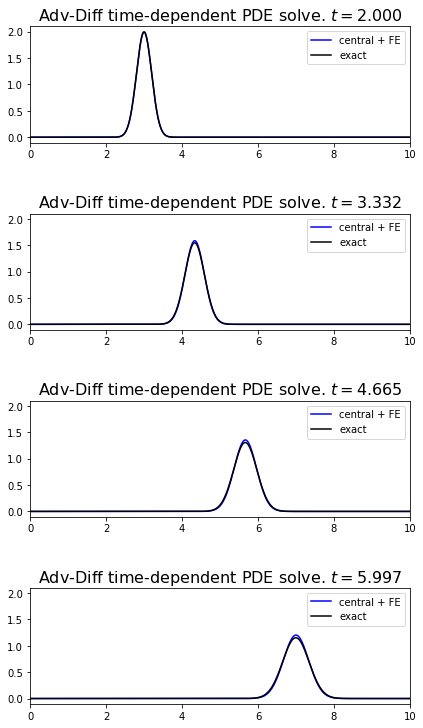

In [4]:
# try a smaller dx and dt

U = 1
kappa = 1./100.
N = 1000
L = 10.
dx = L / N
dt = 0.0025
t_start = 2.
t_end = t_start + 4.
x0 = 1.0

# and compute and print some key non-dimensional parameters
print('CFL:  {0:.5f}'.format(U*dt/dx))
print('Pe_c: {0:.5f}'.format(U*dx/kappa))
print('r:    {0:.5f}'.format(kappa*dt/(dx**2)))

# set up figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

C, x, t = solve_adv_diff_Gaussian3(N, dt, t_start, t_end, U, kappa)
xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, C.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x, C[:,n], 'b-', label='central + FE')
    axs[i].plot(xf, adv_diff_analytical_solution(U, kappa, x0, xf, t[n]), 'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('Adv-Diff time-dependent PDE solve. $t=${0:.3f}'.format(t[n]), fontsize=16)

## Homework - Pure advection - impact of time step

Write a solver for a pure advection problem in a periodic domain using forward Euler with upwind differences in space and with a Gaussian initial condition.

First test that it works/fails based on the CFL condition.

Then update the solver such that it selects the timestep automatically to satisfy a user-defined target Courant number, e.g. look to enforce a Courant number of 0.8.

### Solution - Pure advection - impact of time step

In [5]:
def adv_upwind_periodic(N):
    # advection - periodic
    Dx = np.eye(N, k=0) - np.eye(N, k=-1)
    # Add in the wrapped value due to periodicity
    Dx[0, -1] = -1
    return Dx

CFL:  0.20000
CFL:  0.40000
CFL:  0.80000
CFL:  1.60000


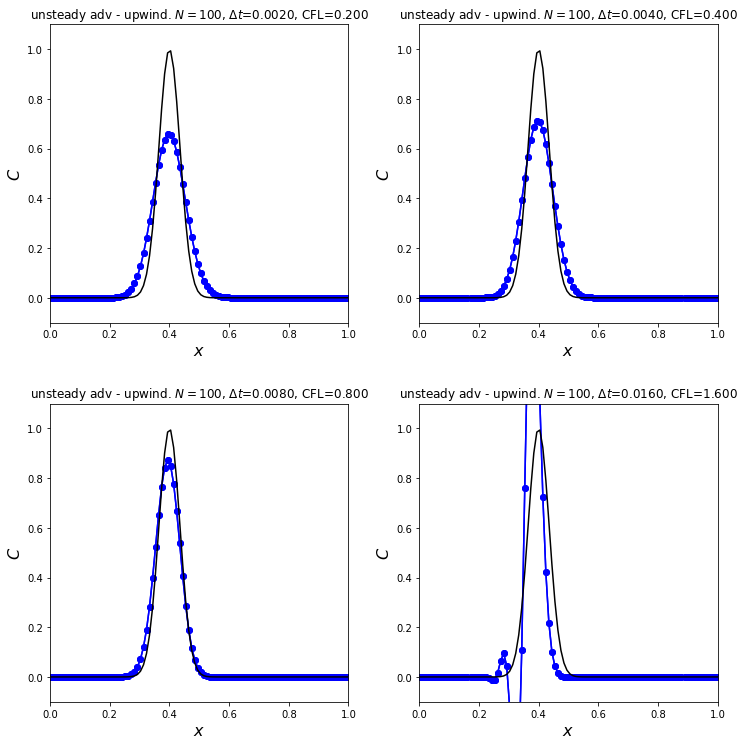

In [6]:
# physical parameters
L = 1
U = 1

def solve_adv_upwind(N, dt, t_start, t_end, U):
    # define spatial mesh
    dx = L / N
    x = np.linspace(0, L, N)

    # create discrerisation matrix
    Dx = adv_upwind_periodic(N)
    A = -(U / dx) * Dx

    # time step using forward Euler - refer back to IVP lecture for details
    print('CFL:  {0:.5f}'.format(U*dt/dx))

    t = np.arange(t_start, t_end, dt)

    C = np.empty((len(x), 1))
    # define an initial condition
    C = np.exp(-((x-0.2)/0.05)**2)
    I = np.eye(len(x))
    for n in range(len(t)-1):
        C_prev = np.copy(C)
        C = (I + A * dt) @ C_prev
    return C, x


# set up figure with 4 subplots to plot 4 resolutions
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# reshape so that we can iterate below over axs[i] instead of ax[i,j]
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=6)

# let's compute solution and plot for 4 different time steps
N = 100
t_end = 0.2
for i, dt in enumerate((0.002, 0.004, 0.008, 0.016)):
    # call function to generate numerical solution
    C, x = solve_adv_upwind(N, dt, 0.0, t_end, U)
    axs[i].plot(x, C, 'bo-')
    axs[i].plot(x, C, 'bo-', x, np.exp(-(((x-U*t_end)-0.2)/0.05)**2), 'k')
    axs[i].set_xlabel('$x$', fontsize=16)
    axs[i].set_ylabel('$C$', fontsize=16)
    axs[i].set_title(
        'unsteady adv - upwind. $N=${0:3d}, $\Delta t$={1:.4f}, CFL={2:.3f}'.format(N, dt, U*dt/(L / N)), fontsize=12)
    axs[i].set_xlim(0, 1)
    axs[i].set_ylim(-0.1, 1.1)

#### Comments

- So we see the scheme go unstable as we break the CFL<1 criterion we established for forward Euler.


- We can of course fix this by allowing the solver to choose its own time step.

#### Pure advection - variable time step

Let's see what happens if we refine the mesh but ask the solver to select a time step to maintain stability


Computing solution for N =  50
Computing solution for N =  100
Computing solution for N =  200
Computing solution for N =  400


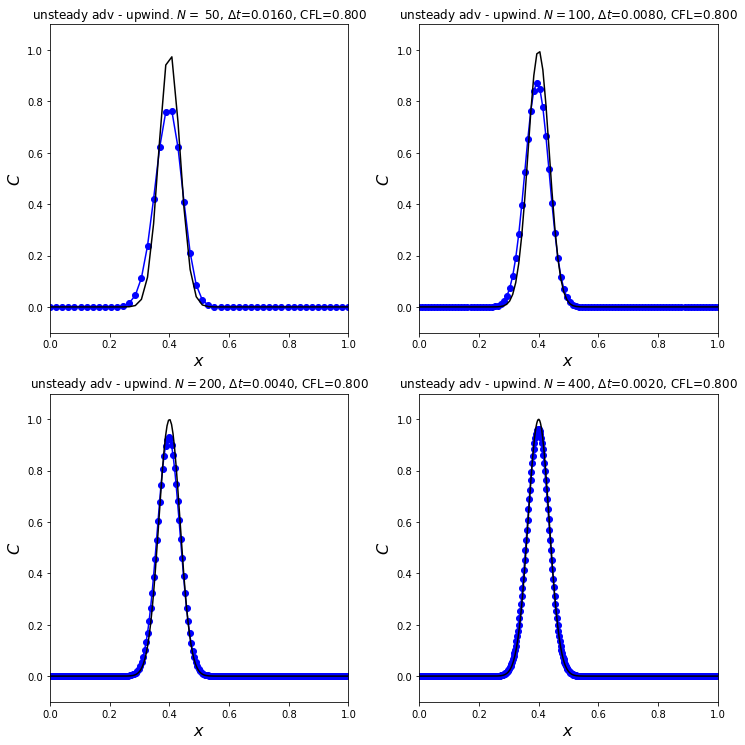

In [7]:
# physical parameters
L = 1
U = 1

tend = 0.2

def solve_adv_upwind_CFL(N, CFL, t_start, t_end, U):
    # define spatial mesh
    dx = L / N
    x = np.linspace(0, L, N)

    # create discrerisation matrix
    Dx = adv_upwind_periodic(N)
    A = -(U / dx) * Dx

    dt = CFL*dx/U
    
    t = np.arange(0, tend, dt)

    C = np.empty((len(x), 1))
    # define an initial condition
    C = np.exp(-((x-0.2)/0.05)**2)
    I = np.eye(len(x))
    for n in range(len(t)-1):
        C_prev = np.copy(C)
        C = (I + A * dt) @ C_prev
    return C, x, dt


# set up figure with 4 subplots to plot 4 resolutions
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# reshape so that we can iterate below over axs[i] instead of ax[i,j]
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=4)

t_end = 0.2
# let's compute solution and plot for 4 different mesh resolutions
for (i, N) in enumerate((50, 100, 200, 400)):
    print('Computing solution for N = ',N)
    # call function to generate numerical solution
    C, x, dt = solve_adv_upwind_CFL(N, 0.8, 0.0, t_end, U)
    axs[i].plot(x, C, 'bo-', x, np.exp(-(((x-U*t_end)-0.2)/0.05)**2), 'k')
    axs[i].set_xlabel('$x$', fontsize=16)
    axs[i].set_ylabel('$C$', fontsize=16)
    axs[i].set_title(
        'unsteady adv - upwind. $N=${0:3d}, $\Delta t$={1:.4f}, CFL={2:.3f}'.format(N, dt, U*dt/(L / N)), fontsize=12)
    axs[i].set_xlim(0, 1)
    axs[i].set_ylim(-0.1, 1.1)


#### Comments

- We see that by refining both the mesh size and the time step together we both retain stability as well as (appear to - we should check this rigorously of course) converge to the true solution.